# Short introduction to working with DEMs in Python GDAL

Greg Tucker, CU Boulder, Feb 2016

## Install GDAL library

You'll need to install the GDAL library. If you have Anaconda installed, you can do this from the command line by:

``conda install gdal``

## Download some DEM data to work with

Navigate a browser to ``http://criticalzone.org/boulder/data/dataset/2915/``

Select *Betasso (Snow off - filtered) - 1m Filtered DSM*

Save the zip file, and double-click to unzip it. Inside the folder ``img`` you will see a file called ``czo_1m_bt1.img``. This is a 1 m resolution lidar-derived DEM of a stretch of Boulder Creek Canyon, with the small Betasso tributary catchment located roughly in the center.

## Import the GDAL library

Here we import GDAL and NumPy.

In [1]:
from osgeo import gdal
import numpy as np


## Open and read data from the DEM

Change the path name below to reflect your particular computer, then run the cell.

In [2]:
betasso_dem_name = '/Users/Charlie/Documents/Graduate_School/CU/classes/spring_2016/modeling/greg_gdal_tutorial/dem_analysis_with_gdal/czo_1m_bt1.img'

In [3]:
geo = gdal.Open(betasso_dem_name)
zb = geo.ReadAsArray()

If the previous two lines worked, ``zb`` should be a 2D numpy array that contains the DEM elevations. There are some cells along the edge of the grid with invalid data. Let's set their elevations to zero, using the numpy ``where`` function:

In [4]:
zb[np.where(zb<0.0)[0],np.where(zb<0.0)[1]] = 0.0

Now let's make a color image of the data. To do this, we'll need Pylab and a little "magic".

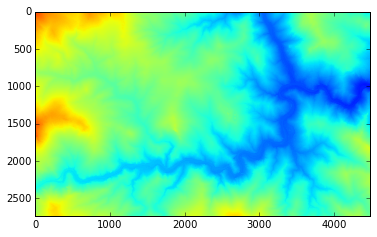

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(zb, vmin=1600.0, vmax=2350.0)

The image shows Boulder Creek Canyon along the lower half, flowing eastward, and its tributary Fourmile Creek coming in the from the north.

## Make a slope map

Use the numpy ``gradient`` function to make an image of absolute maximum slope angle at each cell:

In [13]:
g = np.gradient(zb)
sb = np.sqrt(g[0] * g[0] + g[1] * g[1])

Let's see what it looks like:

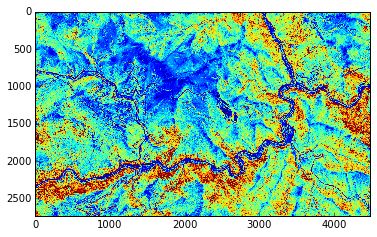

In [14]:
plt.imshow(sb, vmin=0.0, vmax=1.0)

(to be continued...)